<a href="https://colab.research.google.com/github/thanhcdt1820/Kiemtragiuaky/blob/main/Flower_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [ ]:
def load_data():
    file = open('/content/drive/MyDrive/Thanh/flower.data', 'rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)

    return pixels, labels

images, labels = load_data()

(4317, 150, 150, 3)
(4317, 5)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state = 10)
X = X_test
X_train.shape

(3453, 150, 150, 3)

In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), strides=(1,1), padding = 'same', activation = 'relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3),strides=(1,1), padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                    

In [ ]:
aug = ImageDataGenerator(rotation_range=20,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [ ]:
history = model.fit_generator(aug.flow(X_train, y_train, batch_size=64), epochs=25, validation_data=aug.flow(X_test,y_test, batch_size=64))

<ipython-input-8-d88845760a12>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(aug.flow(X_train, y_train, batch_size=64), epochs=25, validation_data=aug.flow(X_test,y_test, batch_size=64))


Epoch 1/25
54/54 [==============================] - 65s 765ms/step - loss: 1.5044 - accuracy: 0.3186 - val_loss: 1.2769 - val_accuracy: 0.4479
Epoch 2/25
54/54 [==============================] - 29s 534ms/step - loss: 1.2172 - accuracy: 0.4802 - val_loss: 1.1681 - val_accuracy: 0.4907
Epoch 3/25
54/54 [==============================] - 29s 527ms/step - loss: 1.1230 - accuracy: 0.5248 - val_loss: 1.1202 - val_accuracy: 0.5521
Epoch 4/25
54/54 [==============================] - 29s 534ms/step - loss: 1.0451 - accuracy: 0.6018 - val_loss: 1.0202 - val_accuracy: 0.6088
Epoch 5/25
54/54 [==============================] - 29s 527ms/step - loss: 1.0089 - accuracy: 0.5992 - val_loss: 0.9486 - val_accuracy: 0.6319
Epoch 6/25
54/54 [==============================] - 29s 528ms/step - loss: 0.9244 - accuracy: 0.6310 - val_loss: 0.9497 - val_accuracy: 0.6273
Epoch 7/25
54/54 [==============================] - 29s 530ms/step - loss: 0.8743 - accuracy: 0.6617 - val_loss: 0.8797 - val_accuracy: 0.6690

In [ ]:
model.save('/content/drive/MyDrive/Flowers/Flower_5.h5')

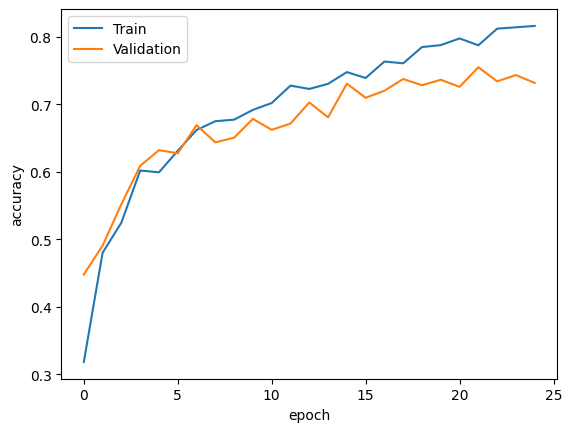

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

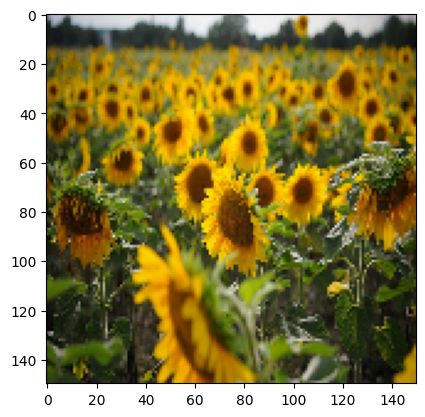

1/1 [==============================] - 0s 28ms/step
[[4.6427795e-03 1.8282672e-02 4.2403724e-05 9.6458501e-01 1.2447215e-02]]
This picture is:  sunflower [4.6427795e-03 1.8282672e-02 4.2403724e-05 9.6458501e-01 1.2447215e-02]
0.964585


In [ ]:
class_name = ['daisy','dandelion','rose','sunflower','tulip']
image = X[100]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[100]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

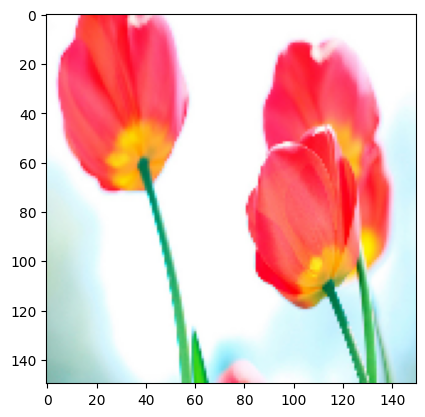

1/1 [==============================] - 0s 20ms/step
[[7.8803999e-04 3.4800403e-05 3.3460072e-01 2.4827857e-05 6.6455156e-01]]
This picture is:  tulip [7.8803999e-04 3.4800403e-05 3.3460072e-01 2.4827857e-05 6.6455156e-01]
0.66455156


In [ ]:
class_name = ['daisy','dandelion','rose','sunflower','tulip']
image = X[654]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[654]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

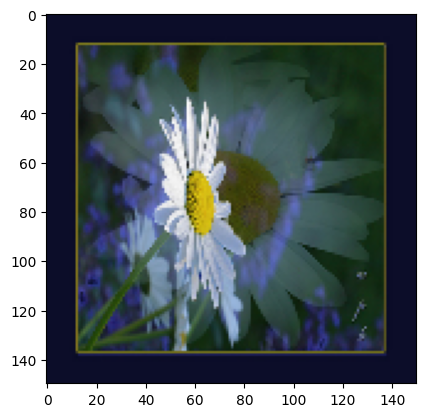

1/1 [==============================] - 0s 19ms/step
[[9.9550229e-01 3.4934087e-03 6.9396524e-04 2.8929341e-04 2.1156849e-05]]
This picture is:  daisy [9.9550229e-01 3.4934087e-03 6.9396524e-04 2.8929341e-04 2.1156849e-05]
0.9955023


In [ ]:
class_name = ['daisy','dandelion','rose','sunflower','tulip']
image = X[279]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[279]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))